# California Housing - Which attribute is most predictive?
## Linear Regression
### Cody B February 8th, 2025

The goal of this analysis is to determine which attribute in the "California Housing" dataset explains most of the variation in Median House Value. Put another way, to determine which attribute is most predictive of the Median House Value. This dataset can be is available using sklearn.datasets.fetch_california_housing. The dataset is from StatLib repository. More information can be found here: <https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html>. 

In [1]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = sk.datasets.fetch_california_housing(as_frame=True) # Load data

In [3]:
df = data.frame
df # Exploratory analysis

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


As shown, this dataset consists of 20,640 observations. Nine attributes are in the dataset (from left to right): Median Income, Median House Age, Average number of rooms per household, Average number of bedrooms per hosuehold, Population of block group, Average number of household members, Latitude of block group, Longitdue of block group, and Median House Value. Median House Value will be the target value for this analysis.

In [4]:
df.describe() # Exploratory analysis

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


As shown, the attribute statistics are reasonable. Some of the attributes have higher than expected max values, but as explained on Scikit-learn, this is due to buildings such as vacation resorts and hotels being included.

In [5]:
# Dictionary of {Attribute : R-Squared}
r_squared_scores = {}

# Extract target data
y = df['MedHouseVal'].to_numpy()
y = y.reshape(-1,1)

# For downstream purposes
r_squared_max = 0
y_predict_best = []

# For each column exluding the target column
for column in df.columns:
    if column == "MedHouseVal":
        break
    X = df[column].to_numpy() # Extract attribute data
    X = X.reshape(-1,1)
    reg = sk.linear_model.LinearRegression()
    reg.fit(X,y) # Perform univariate linear regression with ordinary least squares
    y_predict = reg.predict(X) # For each X, predict the y value
    r_squared_scores[column] = sk.metrics.r2_score(y,y_predict) # Calculate the R-sqaured score
    if r_squared_scores[column] > r_squared_max:
        r_squared_max = r_squared_scores[column]
        y_predict_best = y_predict[:]

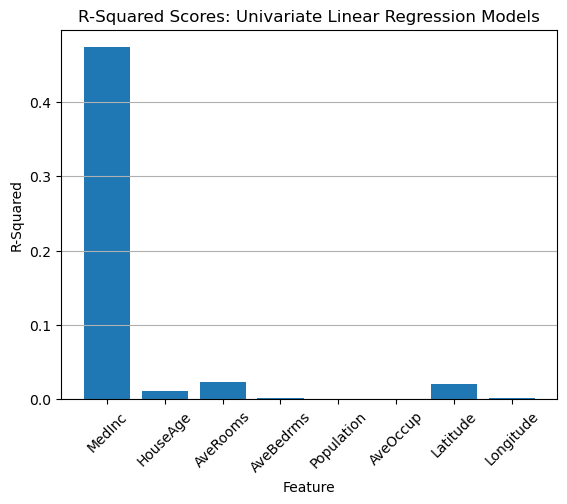

In [6]:
# Plot each attribute and its R-squared score
fig,ax = plt.subplots()
ax.bar(x=r_squared_scores.keys(), height=r_squared_scores.values())
ax.set_title("R-Squared Scores: Univariate Linear Regression Models")
ax.set_ylabel("R-Squared")
ax.set_xlabel("Feature")
ax.grid(True,"major","y")
ax.tick_params("x",rotation=45)
plt.show()

As shown, the Median Income attribute has the highest R-squared score. Roughly 47% of the variation of Median House Value can be explained by taking Median Income into account. 

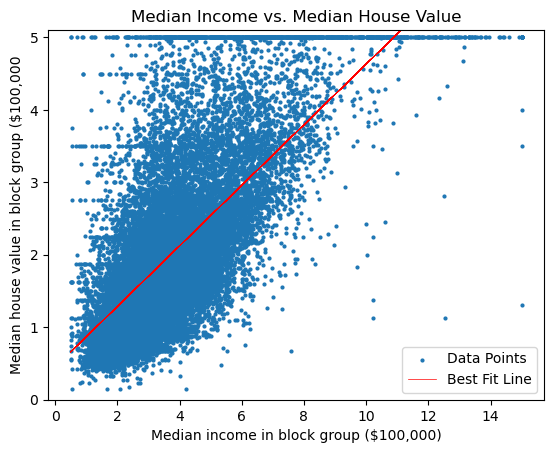

In [7]:
# Plot Median Income vs Median House Value and best fit line
X = df["MedInc"].to_numpy().reshape(-1,1)
fig,ax = plt.subplots()
ax.set_title("Median Income vs. Median House Value")
ax.scatter(X,y,s=4,label="Data Points")
ax.plot(X,y_predict_best,color="red",linewidth=0.5,label="Best Fit Line")
ax.set_ylim(0,5.1)
ax.legend()
ax.set_xlabel("Median income in block group ($100,000)")
ax.set_ylabel("Median house value in block group ($100,000")
plt.show()